# Proyek Macihne Learning: Chest Image
- **Nama:** Kurnia Raihan Ardian
- **Email:** raihanardila22@gmail.com
- **ID Dicoding:** raihanardila

Persiapan Library

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import kagglehub  # Untuk mengunduh dataset dari Kaggle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


Load Dataset

In [105]:
# Download Dataset dari KaggleHub
dataset_path = "/Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")

# ✅ Cek apakah folder training & validation ada
print("🔍 Train folder:", os.path.exists(train_dir))
print("🔍 Validation folder:", os.path.exists(val_dir))

# ✅ Cek jumlah gambar di setiap folder
for root, dirs, files in os.walk(dataset_path):
    print(f"📁 {root}: {len(files)} file")



🔍 Train folder: True
🔍 Validation folder: True
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray: 0 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test: 0 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/PNEUMONIA: 390 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/NORMAL: 234 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray: 0 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test: 0 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test/PNEUMONIA: 390 file
📁 /Users/s2idev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/vers

Data Augmentation & Preprocessing

In [113]:
# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Tidak perlu augmentasi pada validasi

train_generator = train_datagen.flow_from_directory(
    train_dir,  # ✅ Path dataset training yang benar
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,  # ✅ Path dataset validation yang benar
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

x_batch, y_batch = next(train_generator)
print("✅ Dataset berhasil dimuat:", x_batch.shape, y_batch.shape)

num_classes = len(train_generator.class_indices)
print("📂 Kelas dalam dataset:", train_generator.class_indices)




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
✅ Dataset berhasil dimuat: (32, 150, 150, 3) (32, 2)
📂 Kelas dalam dataset: {'NORMAL': 0, 'PNEUMONIA': 1}


Membangun Model CNN

In [117]:
# Membangun Model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')  # ✅ Sesuaikan jumlah output
])

Compile Model

In [118]:
# Compile Model
loss_function = 'categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=0.0001), loss=loss_function, metrics=['accuracy'])



Callback: EarlyStopping & ReduceLROnPlateau

In [119]:
# Callback: EarlyStopping & ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)



Training Model

In [120]:
# Training Model
history = model.fit(
    train_generator, validation_data=val_generator, epochs=50, callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 155s 931ms/step - accuracy: 0.7342 - loss: 0.5878 - val_accuracy: 0.6250 - val_loss: 0.6619 - learning_rate: 1.0000e-04
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 869ms/step - accuracy: 0.7731 - loss: 0.4464 - val_accuracy: 0.6250 - val_loss: 0.9733 - learning_rate: 1.0000e-04
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 124s 759ms/step - accuracy: 0.8276 - loss: 0.3432 - val_accuracy: 0.6250 - val_loss: 0.6394 - learning_rate: 1.0000e-04
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 769ms/step - accuracy: 0.8410 - loss: 0.3324 - val_accuracy: 0.6250 - val_loss: 1.0258 - learning_rate: 1.0000e-04
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 147s 899ms/step - accuracy: 0.8710 - loss: 0.2875 - val_accuracy: 0.6250 - val_loss: 1.2350 - learning_rate: 1.0000e-04
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 785ms/step - accuracy: 0.8778 - loss: 0.2773 - val_accuracy: 0.6250 - val_loss: 0.8643 - learning_rate: 1.0000e-04
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 

Evaluasi Model

In [84]:
# Evaluasi Model
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"✅ Akurasi Training: {train_acc*100:.2f}%")
print(f"✅ Akurasi Validation: {val_acc*100:.2f}%")

✅ Akurasi Training: 90.07%
✅ Akurasi Validation: 75.00%


Plot Akurasi dan Loss

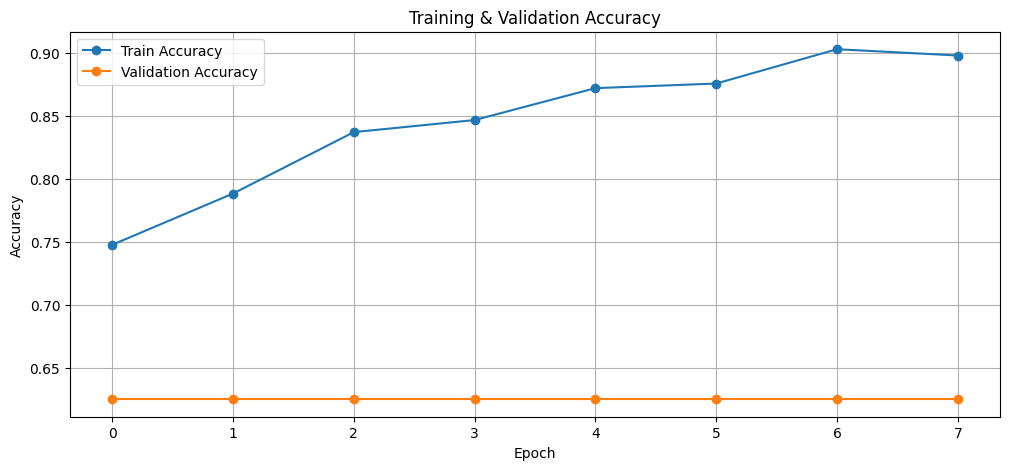

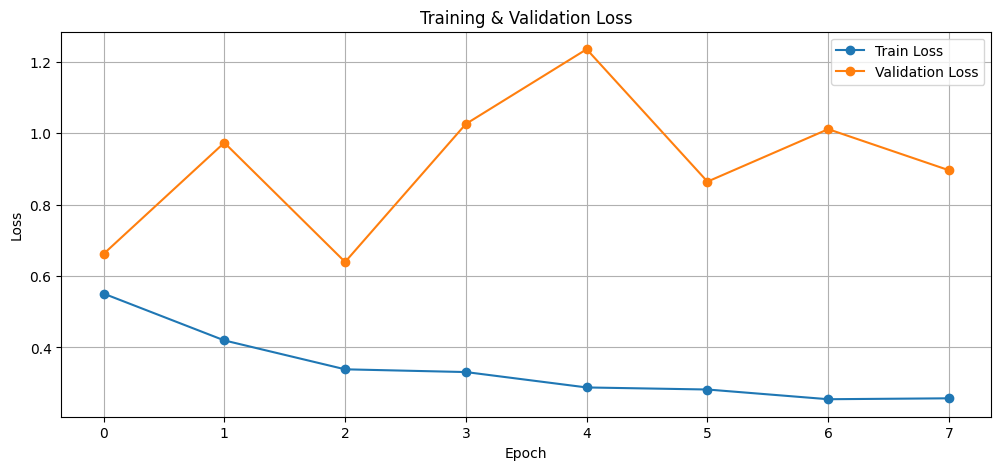

In [121]:
# Plot Akurasi dan Loss

# Plot Akurasi
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Menyimpan Model dalam 3 Format

In [122]:
# Menyimpan Model dalam 3 Format
model.save("saved_model.keras")

model.save("saved_model.h5")

model.export("saved_model/")  # Format TensorFlow SavedModel


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_165')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  6613571184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613570304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613574928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613574752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613576864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613576512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613431744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613431568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613433680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6613433328: TensorSpec(shape=(), dtype=tf.resource, name=None)


Konversi ke TF-Lite

In [123]:
# Konversi ke TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model/")
tflite_model = converter.convert()
os.makedirs("tflite", exist_ok=True)
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

W0000 00:00:1740656055.950031  184143 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1740656055.952247  184143 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-02-27 18:34:15.960044: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model/
2025-02-27 18:34:15.963465: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-02-27 18:34:15.963484: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model/
2025-02-27 18:34:15.990209: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-02-27 18:34:16.149031: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: saved_model/
2025-02-27 18:34:16.167480: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 208123 microseconds.


Simpan label TF-Lite

In [124]:
# Simpan label TF-Lite
labels = ["Normal", "Pneumonia", "Tuberculosis"]
with open("tflite/label.txt", "w") as f:
    f.write("\n".join(labels))


Konversi Model ke TFJS

In [125]:
# Konversi Model ke TFJS
!pip install tensorflowjs  # Pastikan TensorFlow.js sudah terinstal
os.makedirs("tfjs_model", exist_ok=True)
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model tfjs_model